### Download Data

In [1]:
import pandas as pd
import numpy as np
# read data to pandas frame
url = 'https://raw.githubusercontent.com/Dr-Ning-An/Deep-Learning-with-Keras/main/FixedBeam/FixedBeamData.csv'
data = pd.read_csv(url)
data.shape
# print(data.head(5))

(5000, 4)

In [2]:
n = 5000; # data size

In [3]:
inputs = data.iloc[:, 0:2][0:n] # read the first two columns n size data as inputs
# Normalize the inputs
inputs_norm = (inputs - inputs.mean()) / inputs.std()
n_inputs_norm = inputs_norm.shape[1]
print(inputs_norm.head(5))
outputs = data.iloc[:, 2:4][0:n] # read the last two columns n size data as inputs
# Normalize the outputs
outputs_norm = (outputs - outputs.mean()) / outputs.std()
n_outputs_norm = outputs_norm.shape[1]
print(outputs_norm.head(5))

   Coordinate x [m]  Distributed load q [kN/m]
0         -1.455816                  -1.561807
1          0.923784                   1.380999
2          1.618613                   1.443347
3          1.435727                  -0.178383
4         -1.290942                   0.628672
   Displacement u [m]  Curvature kappa [m-1]
0            1.231600              -0.666018
1           -0.460458               0.218307
2            1.293882              -2.480789
3            1.116590              -1.089553
4            0.761128              -0.853157


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# define regression model
def ANN_model():
    # create model
    model = Sequential()
    model.add(Dense(20, activation='tanh', input_shape=(n_inputs_norm,)))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(n_outputs_norm))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [5]:
# build the model
model = ANN_model()

In [6]:
from sklearn.model_selection import train_test_split
# Randomly split the data into a training and test sets by holding 30% of the data for testing.
inputs_norm_train, inputs_norm_test, outputs_norm_train, outputs_norm_test = train_test_split(inputs_norm, outputs_norm, test_size = 0.3, random_state=42)
# fit the model
model.fit(inputs_norm_train, outputs_norm_train, epochs=300, batch_size=60)

Epoch 1/300
59/59 [==============================] - 1s 3ms/step - loss: 0.9129
Epoch 2/300
59/59 [==============================] - 0s 2ms/step - loss: 0.8055
Epoch 3/300
59/59 [==============================] - 0s 2ms/step - loss: 0.4985
Epoch 4/300
59/59 [==============================] - 0s 5ms/step - loss: 0.1895
Epoch 5/300
59/59 [==============================] - 0s 5ms/step - loss: 0.0879
Epoch 6/300
59/59 [==============================] - 0s 4ms/step - loss: 0.0534
Epoch 7/300
59/59 [==============================] - 0s 5ms/step - loss: 0.0354
Epoch 8/300
59/59 [==============================] - 0s 5ms/step - loss: 0.0252
Epoch 9/300
59/59 [==============================] - 0s 6ms/step - loss: 0.0188
Epoch 10/300
59/59 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 11/300
59/59 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 12/300
59/59 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 13/300
59/59 [=================

In [7]:
test_data = outputs_norm_test * outputs.std() + outputs.mean()
print(test_data)
test_data_disp = test_data.to_numpy()[:,0]
test_data_kappa = test_data.to_numpy()[:,1]

      Displacement u [m]  Curvature kappa [m-1]
1501           -0.000018           2.189027e-06
2586           -0.000028           4.417503e-06
2653           -0.000011           1.687692e-07
1055           -0.000007          -1.228831e-06
705            -0.000024           2.719783e-06
...                  ...                    ...
3563           -0.000007           3.566781e-07
1538           -0.000005          -5.187704e-06
1837           -0.000007          -2.813252e-06
2380           -0.000016           2.080151e-07
1912           -0.000020           2.393105e-06

[1500 rows x 2 columns]


In [8]:
pred_data_norm = model.predict(inputs_norm_test)
pred_data_norm_df = pd.DataFrame(pred_data_norm, columns = ['Displacement u [m]','Curvature kappa [m-1]'])
pred_data_df = pred_data_norm_df * outputs.std() + outputs.mean()
print(pred_data_df)
pred_data_disp = pred_data_df.to_numpy()[:,0]
pred_data_kappa = pred_data_df.to_numpy()[:,1]

47/47 [==============================] - 0s 2ms/step
      Displacement u [m]  Curvature kappa [m-1]
0              -0.000017           2.170905e-06
1              -0.000028           4.395499e-06
2              -0.000011           1.505102e-07
3              -0.000007          -1.248525e-06
4              -0.000024           2.710475e-06
...                  ...                    ...
1495           -0.000007           3.569878e-07
1496           -0.000005          -5.190475e-06
1497           -0.000007          -2.816877e-06
1498           -0.000016           2.069374e-07
1499           -0.000020           2.380751e-06

[1500 rows x 2 columns]


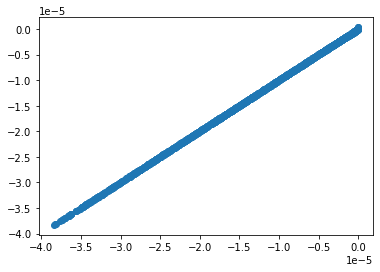

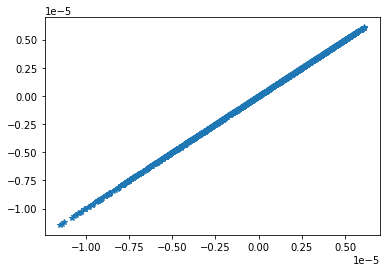

In [9]:
# Evaluate the mdoel on the test data and compare the error between predictions and true data
import matplotlib.pyplot as plt
plt.plot(test_data_disp, pred_data_disp, 'o')
plt.show()
plt.plot(test_data_kappa, pred_data_kappa, '*')
plt.show()

### Chain rule

$\frac{d^2u_{norm}}{dx_{norm}^2}$ could be obtained by calculating the gradient of neural network output with respect to input, we then solve $\frac{d^2u}{dx^2}$ by using the chain rule.

$x_{norm} = (x - \bar{x})/\sigma_{x}$ 

$u_{norm} = (u - \bar{u})/\sigma_{u}$

where $x_{norm}$ and $u_{norm}$ denote the normalized data, $x$ and $u$ represent the naive data, $\bar{x}$ and $\bar{u}$ denote the mean of the data, and $\sigma_{x}$ and $\sigma_{u}$ denote the standard deviation of the data.

$\frac{d^2u}{dx^2} = \frac{d^2u}{du_{norm}^2} (\frac{du_{norm}}{dx})^2 + \frac{du}{du_{norm}} \frac{d^2u_{norm}}{dx^2} $

$ \quad \quad = \frac{d^2u}{du_{norm}^2} (\frac{du_{norm}}{dx_{norm}} \frac{dx_{norm}}{dx})^2 + \frac{du}{du_{norm}} \cdot [\frac{d^2u_{norm}}{dx_{norm}^2} (\frac{dx_{norm}}{dx})^2 + \frac{du_{norm}}{dx_{norm}} \frac{d^2x_{norm}}{dx^2}]$

$\quad \quad = 0 + \frac{du}{du_{norm}} \cdot [\frac{d^2u_{norm}}{dx_{norm}^2} (\frac{dx_{norm}}{dx})^2 + 0 ]$

$\quad \quad = \frac{du}{du_{norm}} \cdot \frac{d^2u_{norm}}{dx_{norm}^2} \cdot (\frac{dx_{norm}}{dx})^2 $

where $\frac{du}{du_{norm}} = \sigma_{u}$ is the standard deviation of $u$ data and $\frac{dx_{norm}}{dx} = \frac{1}{\sigma_{x}}$ and $\sigma_{x}$ is the standard deviation of $x$ data.

In [10]:
import tensorflow as tf
def F_model(x_norm,q_norm):
    x_norm = tf.Variable(x_norm)
    q_norm = tf.Variable(q_norm)
    with tf.GradientTape() as g:
      g.watch(x_norm)
      with tf.GradientTape() as gg:
        gg.watch(x_norm)
        u_norm = model(tf.stack([x_norm,q_norm], axis=1))[:,0]
      du_norm_dx_norm = gg.gradient(u_norm, x_norm)  
    d2u_norm_dx_norm2 = g.gradient(du_norm_dx_norm, x_norm)  

    # Chain rule
    du_du_norm = outputs.std()[0]
    dx_norm_dx = 1/inputs.std()[0]
    d2u_dx2 =  du_du_norm *  d2u_norm_dx_norm2 * dx_norm_dx**2

    u = u_norm * outputs.std()[0] + outputs.mean()[0]

    return u, d2u_dx2

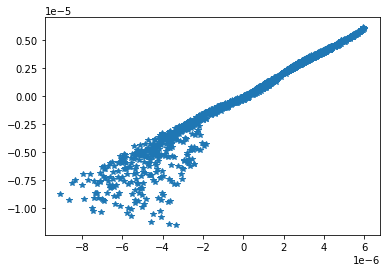

In [11]:
x_norm = inputs_norm_test.to_numpy()[:,0]
q_norm = inputs_norm_test.to_numpy()[:,1]
[u, d2u_dx2] = F_model(x_norm, q_norm)
plt.plot(d2u_dx2, test_data_kappa, '*')
plt.show()